In [1]:
import os
import yfinance as yf
from datetime import datetime
import pandas as pd
import pytz
import logging
import numpy as np
import plotly.graph_objects as go
from PIL import Image

import matplotlib.pyplot as plt

import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.autograd import Variable

from torch.optim import Adam, SGD
import gc

from ResNet_CNN import *

import math as m
import torch
from torch.nn import Linear, ReLU, Conv1d, Conv2d, Flatten, Sequential, CrossEntropyLoss, MSELoss, MaxPool1d, MaxPool2d, Dropout, BatchNorm1d, BatchNorm2d
import torch.nn.functional as F

from torch.optim import Adam
from torch import nn
import torchvision
from functools import partial
from collections import OrderedDict

import torchvision.models as models


In [2]:
uvxy = yf.Ticker('UVXY')

In [7]:
uvxy.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-05-06,42.05,44.17,41.53,44.05,6145200,0,0
2020-05-07,41.77,42.18,40.62,41.27,6874300,0,0
2020-05-08,39.44,39.90,37.00,37.05,8207800,0,0
2020-05-11,38.30,38.57,33.08,33.33,7854600,0,0
2020-05-12,31.76,38.40,31.42,38.40,10530800,0,0
2020-05-13,38.87,46.71,37.68,44.06,25125300,0,0
2020-05-14,47.48,49.63,40.75,40.75,23006900,0,0
2020-05-15,43.58,44.61,39.19,39.23,15267700,0,0
2020-05-18,35.29,36.43,34.66,35.44,6901700,0,0


In [2]:
model = res_conv(1,16)
print(model)

ResNet(
  (encoder): ResNetEncoder(
    (gate): Sequential(
      (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01, inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (blocks): ModuleList(
      (0): ResNetLayer(
        (blocks): Sequential(
          (0): ResNetBasicBlock(
            (blocks): Sequential(
              (0): Sequential(
                (0): Conv2dAuto(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (1): LeakyReLU(negative_slope=0.01, inplace=True)
              (2): Sequential(
                (0): Conv2dAuto(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                (

In [3]:
loaded = np.load('images_npy/A/A_0.npz')

In [4]:
x = loaded['x']
y = loaded['y']

In [5]:
x.shape, y.shape

((300, 300, 1000), (4, 1000))

In [6]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
encoded.shape

In [8]:
y[:,4]

array([1, 0, 0, 0])

In [9]:
y_T = y.T

In [10]:
y_int = y_T.dot(1 << np.arange(y_T.shape[-1] - 1, -1, -1))

In [11]:
onehot_encoder = OneHotEncoder(sparse=False)
encoded = onehot_encoder.fit_transform(y_int.reshape(-1,1))

In [12]:
x.shape

(300, 300, 1000)

In [23]:
def testdata_preprocessing(X, Y):
    d = X.shape[0]
    X = X.reshape((-1, d, d)).astype(np.float32)

    X = X.reshape(-1, 1, d, d)
    X = torch.from_numpy(X)
    Y = torch.from_numpy(Y)

    return X, Y

In [24]:
X, Y = testdata_preprocessing(x, y_int)

In [25]:
X.size(), Y.size()

(torch.Size([1000, 1, 300, 300]), torch.Size([1000]))

In [27]:
Y = Y.type(torch.long)

In [28]:
variable_x, variable_y = Variable(X), Variable(Y)
output = model(variable_x)

In [29]:
criterion = nn.CrossEntropyLoss()

loss = criterion(output, variable_y)

tensor(0.6946, grad_fn=<BinaryCrossEntropyBackward>)

In [8]:
def train(epochs):
    # dataset
    x_train, y_train = Variable(train_X), Variable(train_Y)
    x_val, y_val = Variable(val_X), Variable(val_Y)

    optimizer.zero_grad()

    output_train = model(x_train)
    output_val = model(x_val)

    loss_train = criterion(output_train, y_train.type(torch.float))
    loss_val = criterion(output_val, y_val.type(torch.float))

    train_losses.append(loss_train.item())
    val_losses.append(loss_val.item())

    loss_train.backward()
    optimizer.step()
    gc.collect()

    print('Epoch: ', epochs + 1, '\t', 'train loss: ', loss_train.item(), '\t', 'val loss: ', loss_val.item())

In [12]:
x_train, y_train = Variable(train_X), Variable(train_Y)
x_val, y_val = Variable(val_X), Variable(val_Y)

optimizer.zero_grad()

output_train = model(x_train)
output_val = model(x_val)

torch.Size([900, 1, 64])
torch.Size([100, 1, 64])


In [13]:
loss_train = criterion(output_train, y_train.type(torch.float))
loss_val = criterion(output_val, y_val.type(torch.float))

loss_train.backward()
optimizer.step()
gc.collect()

0

In [15]:
loss_val

tensor(0.6893, grad_fn=<BinaryCrossEntropyBackward>)

In [14]:
output_val.size()

torch.Size([100, 1])

In [11]:
lr = 0.0001
optimizer = Adam(model.parameters(), lr=lr)
criterion = nn.BCELoss()

train_losses = []
val_losses = []

Learning rate = 0.0001

In [11]:
for epoch in range(20):
    train(epoch)

Epoch:  1 	 train loss:  0.6962229609489441 	 val loss:  0.7140256762504578
Epoch:  2 	 train loss:  0.6973074078559875 	 val loss:  0.7074198126792908
Epoch:  3 	 train loss:  0.6966063380241394 	 val loss:  0.7106146812438965
Epoch:  4 	 train loss:  0.6956771016120911 	 val loss:  0.7093070149421692
Epoch:  5 	 train loss:  0.6945131421089172 	 val loss:  0.7058357000350952
Epoch:  6 	 train loss:  0.6951175928115845 	 val loss:  0.7116212248802185
Epoch:  7 	 train loss:  0.6940714120864868 	 val loss:  0.706545889377594
Epoch:  8 	 train loss:  0.6953884363174438 	 val loss:  0.7124685049057007
Epoch:  9 	 train loss:  0.6949226260185242 	 val loss:  0.7055683135986328
Epoch:  10 	 train loss:  0.6948266625404358 	 val loss:  0.7084885239601135
Epoch:  11 	 train loss:  0.6959483027458191 	 val loss:  0.7091345191001892
Epoch:  12 	 train loss:  0.6959723830223083 	 val loss:  0.709414005279541
Epoch:  13 	 train loss:  0.6968982815742493 	 val loss:  0.7068132758140564
Epoch:  14

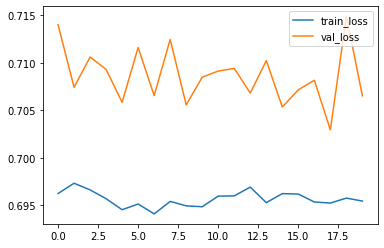

In [12]:
plt.plot(train_losses)
plt.plot(val_losses)
plt.legend(['train_loss', 'val_loss'])

Learning rate = 0.001

In [22]:
lr = 0.001
optimizer = Adam(model.parameters(), lr=lr)
criterion = nn.BCELoss()

train_losses = []
val_losses = []

In [23]:
for epoch in range(20):
    train(epoch)

Epoch:  1 	 train loss:  0.6959353685379028 	 val loss:  0.7093508839607239
Epoch:  2 	 train loss:  0.6960728168487549 	 val loss:  0.703382134437561
Epoch:  3 	 train loss:  0.6939055323600769 	 val loss:  0.7091769576072693
Epoch:  4 	 train loss:  0.6935921311378479 	 val loss:  0.7018258571624756
Epoch:  5 	 train loss:  0.6933984756469727 	 val loss:  0.7062473297119141
Epoch:  6 	 train loss:  0.6942763924598694 	 val loss:  0.7026177048683167
Epoch:  7 	 train loss:  0.6952759623527527 	 val loss:  0.7060246467590332
Epoch:  8 	 train loss:  0.6932543516159058 	 val loss:  0.7019201517105103
Epoch:  9 	 train loss:  0.6953104734420776 	 val loss:  0.6970601081848145
Epoch:  10 	 train loss:  0.6937874555587769 	 val loss:  0.6972057819366455
Epoch:  11 	 train loss:  0.6941234469413757 	 val loss:  0.6972405910491943
Epoch:  12 	 train loss:  0.6943216323852539 	 val loss:  0.6901005506515503
Epoch:  13 	 train loss:  0.6914952993392944 	 val loss:  0.698382556438446
Epoch:  14

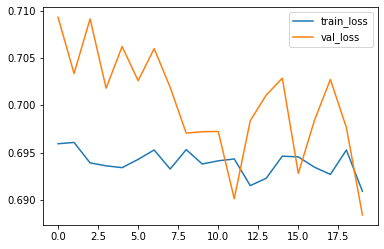

In [24]:
plt.plot(train_losses)
plt.plot(val_losses)
plt.legend(['train_loss', 'val_loss'])

### Use a more complicated CNN model and compare learning rate influences:

Learning rate = 0.0001

In [14]:
model = res_conv1(1,64)

lr = 0.0001
optimizer = Adam(model.parameters(), lr=lr)
criterion = nn.BCELoss()

train_losses = []
val_losses = []

In [15]:
for epoch in range(20):
    train(epoch)

Epoch:  1 	 train loss:  0.6950340270996094 	 val loss:  0.6791068911552429
Epoch:  2 	 train loss:  0.698907732963562 	 val loss:  0.6891040802001953
Epoch:  3 	 train loss:  0.6942399740219116 	 val loss:  0.6824040412902832
Epoch:  4 	 train loss:  0.6935891509056091 	 val loss:  0.6873108744621277
Epoch:  5 	 train loss:  0.6908895969390869 	 val loss:  0.6842872500419617
Epoch:  6 	 train loss:  0.6926819086074829 	 val loss:  0.686575174331665
Epoch:  7 	 train loss:  0.6949875950813293 	 val loss:  0.6874848008155823
Epoch:  8 	 train loss:  0.6898353695869446 	 val loss:  0.6857631206512451
Epoch:  9 	 train loss:  0.6928287148475647 	 val loss:  0.6919037103652954
Epoch:  10 	 train loss:  0.6944131851196289 	 val loss:  0.6953456401824951
Epoch:  11 	 train loss:  0.6899685263633728 	 val loss:  0.6935743093490601
Epoch:  12 	 train loss:  0.6904625296592712 	 val loss:  0.6975009441375732
Epoch:  13 	 train loss:  0.6902791261672974 	 val loss:  0.703230619430542
Epoch:  14 

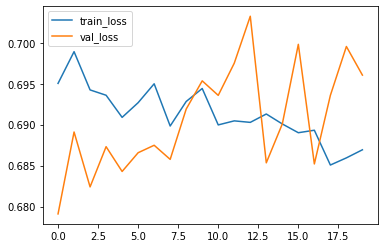

In [16]:
plt.plot(train_losses)
plt.plot(val_losses)
plt.legend(['train_loss', 'val_loss'])

Learning rate = 0.001

In [11]:
model = res_conv1(1,64)

lr = 0.001
optimizer = Adam(model.parameters(), lr=lr)
criterion = nn.BCELoss()

train_losses = []
val_losses = []

In [13]:
for epoch in range(20):
    train(epoch)

Epoch:  1 	 train loss:  0.6968134641647339 	 val loss:  0.7182295918464661
Epoch:  2 	 train loss:  0.7092452049255371 	 val loss:  0.6981413960456848
Epoch:  3 	 train loss:  0.7001753449440002 	 val loss:  0.6887058019638062
Epoch:  4 	 train loss:  0.6913732886314392 	 val loss:  0.6964588165283203
Epoch:  5 	 train loss:  0.6938647031784058 	 val loss:  0.6931012868881226
Epoch:  6 	 train loss:  0.6972495317459106 	 val loss:  0.685946524143219
Epoch:  7 	 train loss:  0.6952718496322632 	 val loss:  0.6996673345565796
Epoch:  8 	 train loss:  0.6972893476486206 	 val loss:  0.7008944749832153
Epoch:  9 	 train loss:  0.6929974555969238 	 val loss:  0.6882033348083496
Epoch:  10 	 train loss:  0.6987436413764954 	 val loss:  0.6882093548774719
Epoch:  11 	 train loss:  0.693304181098938 	 val loss:  0.6958370804786682
Epoch:  12 	 train loss:  0.6943669319152832 	 val loss:  0.7023743987083435
Epoch:  13 	 train loss:  0.6946903467178345 	 val loss:  0.7051029205322266
Epoch:  14

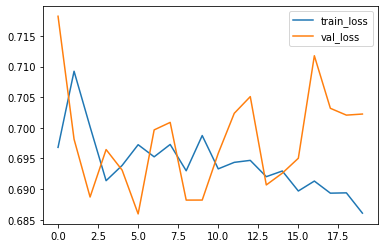

In [14]:
plt.plot(train_losses)
plt.plot(val_losses)
plt.legend(['train_loss', 'val_loss'])